In [4]:
from GGMS.solvers import *
from GGMS.spd_generators import *
from GGMS.stat_funcs import *
from GGMS.experimenting import *
from GGMS.metrics import *
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
import pickle
import multiprocessing as mp

In [5]:
with open('data/16_9_20_40.bin', 'rb') as f:
    density_frames = pickle.load(f)

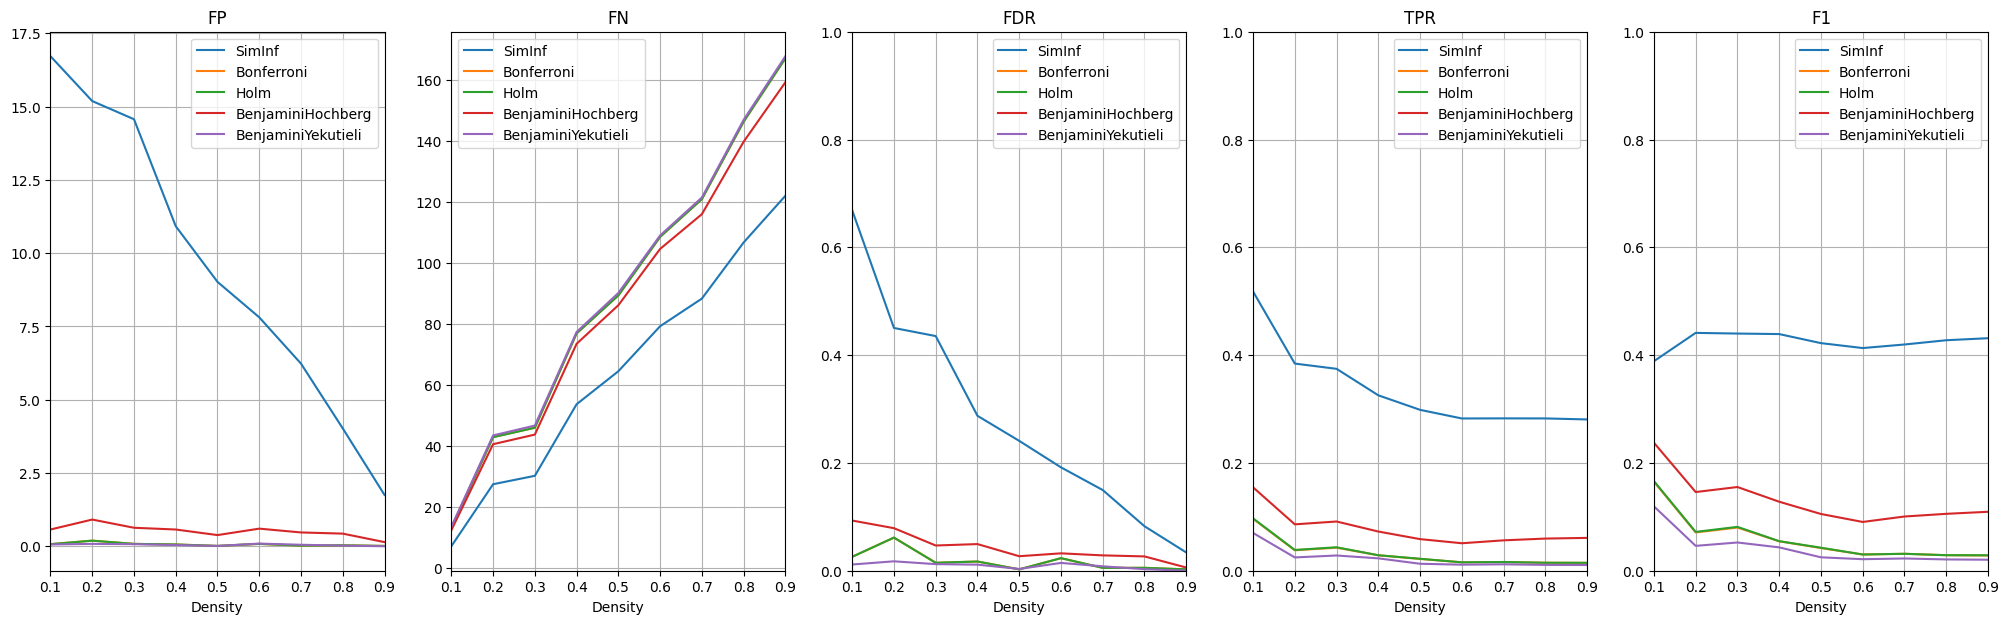

In [6]:
fig, axes = plt.subplots(1, 5)
axes = axes.flatten()
x = np.arange(0.1, 1, 0.1)

for idx, metric in enumerate(density_frames[0].columns):
    density_df = pd.concat([density_frame[metric] for density_frame in density_frames], axis=1).T
    density_df

    for method in density_frames[0].index:
        axes[idx].plot(x, density_df[method], label=method)
    axes[idx].legend()
    axes[idx].set_title(metric)
    axes[idx].set_xlabel('Density')
    axes[idx].set_xlim(0.1, 0.9)
    if idx > 1:
        axes[idx].set_ylim(0, 1)
    axes[idx].grid(True)
fig.set_size_inches((25, 7))

In [7]:
density_frames[-1]

,FP,FN,FDR,TPR,F1
SimInf,1.75,121.92,0.033872,0.280676,0.431370
Bonferroni,0.01,167.03,0.002500,0.014480,0.028215
Holm,0.01,166.99,0.002500,0.014722,0.028677
BenjaminiHochberg,0.14,159.13,0.005904,0.060908,0.109345
BenjaminiYekutieli,0.00,167.68,0.000000,0.010595,0.020401
